In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
import time

In [15]:
# Encode Country and Item using OneHotEncoder

merged_data = pd.read_csv('/content/Final_merged_data.csv')

merged_data_onehot = pd.get_dummies(merged_data, columns = ['Item'], prefix = ['Item'])
merged_data = merged_data_onehot.loc[:, merged_data_onehot.columns != 'Yield (hg/ha)']
merged_data ['Yield (hg/ha)'] = merged_data_onehot['Yield (hg/ha)']
merged_data = merged_data.drop(['Year', 'Country'], axis = 1)
merged_data

,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),"Item_Abaca, manila hemp, raw",Item_Areca nuts,Item_Avocados,Item_Bananas,"Item_Beans, dry",Item_Cabbages,Item_Cantaloupes and other melons,...,Item_Soya beans,Item_Spinach,Item_Sugar cane,Item_Sweet potatoes,Item_Tea leaves,Item_Tomatoes,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Watermelons,Yield (hg/ha)
0,190.783333,26.6,313639.25,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8275
1,190.783333,26.6,313639.25,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12623
2,190.783333,26.6,313639.25,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,109367
3,190.783333,26.6,313639.25,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,568256
4,190.783333,26.6,313639.25,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,50244
716,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,187605
717,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,11544
718,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1528


In [16]:
# Scaling Features

y = merged_data['Yield (hg/ha)']
x = merged_data.drop(['Yield (hg/ha)'], axis=1)

scaler = MinMaxScaler()
data_no_yield = pd.DataFrame(scaler.fit_transform(x), index = y.index)
data_no_yield.columns = x.columns
data_no_yield.insert(len(data_no_yield.columns), 'Yield (hg/ha)', y)

merged_data = data_no_yield
merged_data

,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),"Item_Abaca, manila hemp, raw",Item_Areca nuts,Item_Avocados,Item_Bananas,"Item_Beans, dry",Item_Cabbages,Item_Cantaloupes and other melons,...,Item_Soya beans,Item_Spinach,Item_Sugar cane,Item_Sweet potatoes,Item_Tea leaves,Item_Tomatoes,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Watermelons,Yield (hg/ha)
0,0.669914,0.166667,0.748439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8275
1,0.669914,0.166667,0.748439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12623
2,0.669914,0.166667,0.748439,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109367
3,0.669914,0.166667,0.748439,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568256
4,0.669914,0.166667,0.748439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50244
716,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,187605
717,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11544
718,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1528


In [17]:
# splitting the data into training and testing (80/20)

# excluding Yield (hg/ha) values as it is what the ML model should be predicting
y = merged_data['Yield (hg/ha)']
x = merged_data.drop(['Yield (hg/ha)'], axis=1)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# Search for the optimal hyperparamaters for Decision Trees using GridSearch

from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2', None]
    }

search = GridSearchCV(estimator = regressor, param_grid = param_grid, cv=5).fit(x_train, y_train)

print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [19]:
# training time
start_training_time = time.time()
regressor = DecisionTreeRegressor(max_depth = search.best_params_["max_depth"],
                                  max_features = search.best_params_["max_features"],
                                  min_samples_leaf = search.best_params_["min_samples_leaf"],
                                  min_samples_split = search.best_params_["min_samples_split"])
regressor.fit(x_train, y_train)
end_training_time = time.time()
training_time = end_training_time - start_training_time

# prediction time
start_pred_time = time.time()
Y_pred = regressor.predict(x_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 0.01 seconds
Prediction Time: 0.00199 seconds


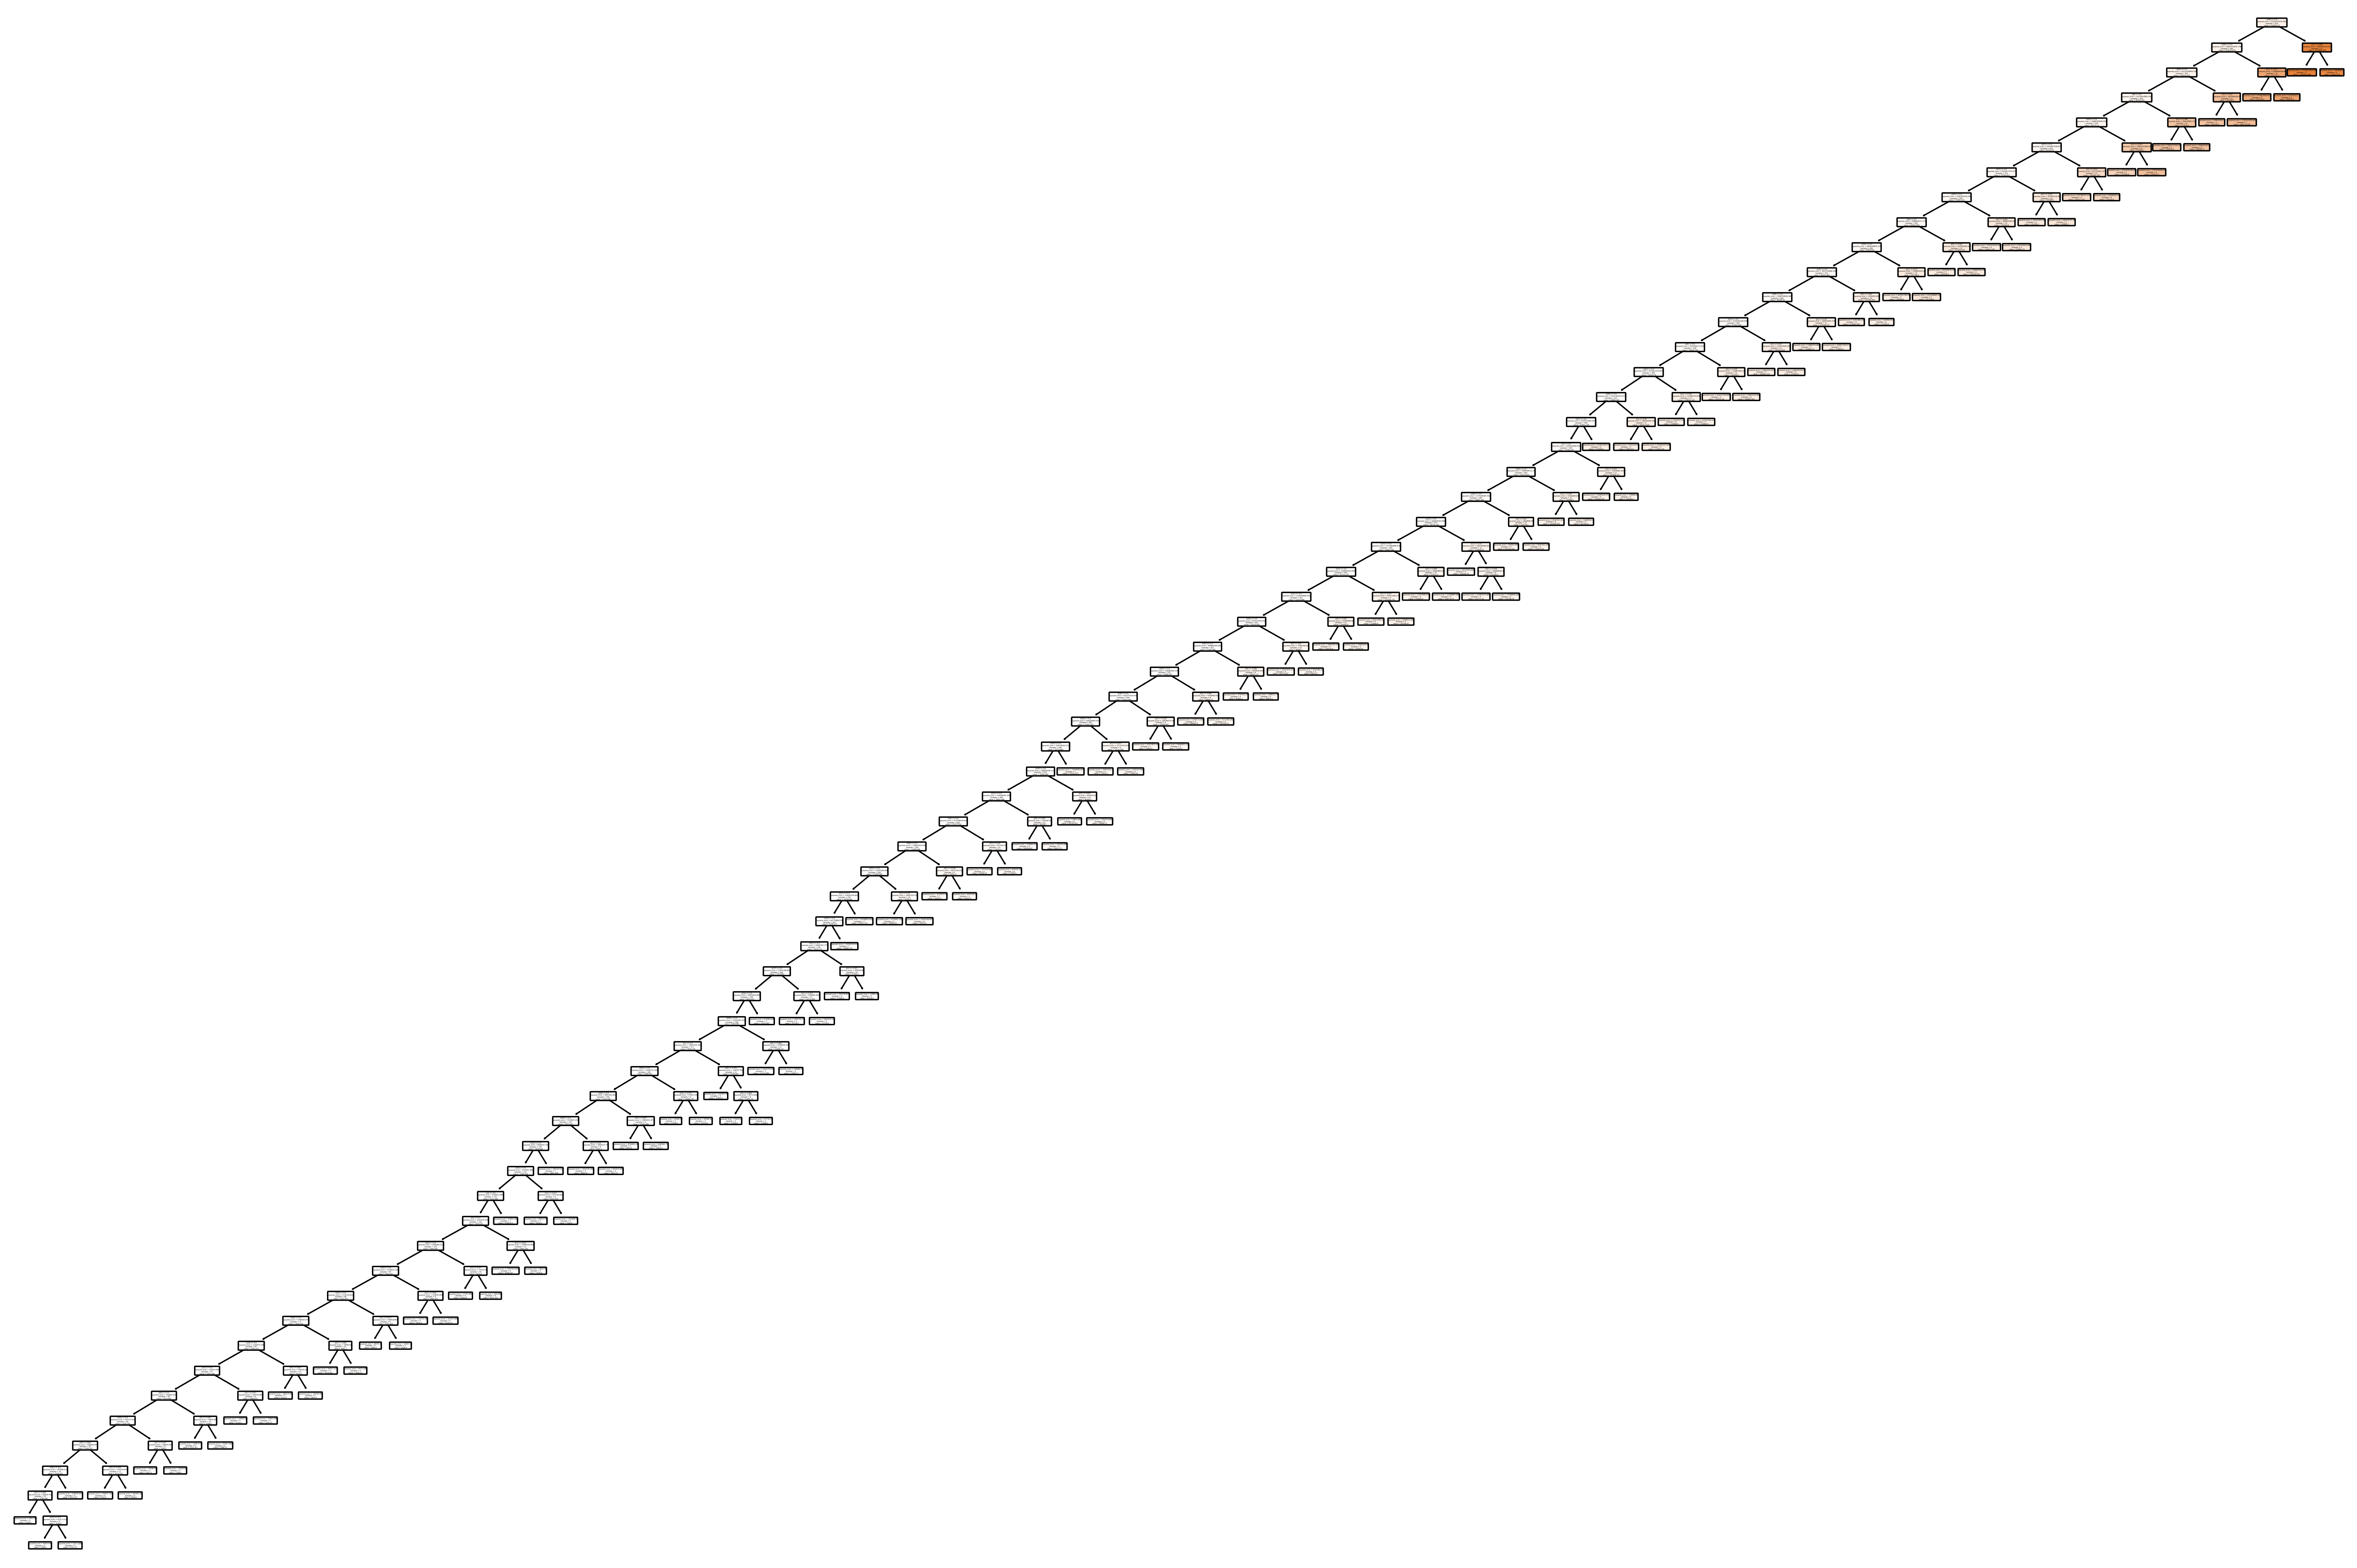

In [25]:
fig, ax = plt.subplots(figsize=(30, 20), dpi=300)
plot_tree(regressor, filled=True, rounded=True, ax=ax)
plt.savefig('/content/decision_tree.png')  # Specify the desired file path
plt.show()

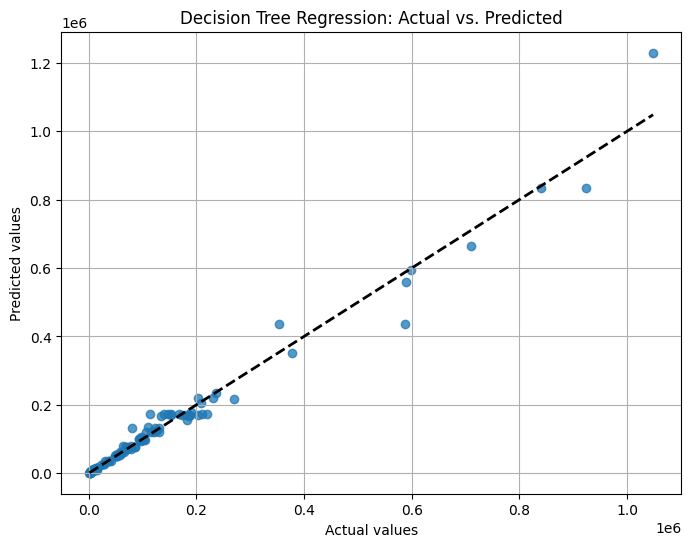

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,Y_pred, alpha=0.75)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Decision Tree Regression: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error

In [23]:
r2 = r2_score(y_test, Y_pred)
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = mean_squared_error(y_test, Y_pred, squared=False)
max_err = max_error(y_test, Y_pred) # max error
mape = mean_absolute_percentage_error(y_test, Y_pred)

print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Max Error: {max_err:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

R-squared (R2): 0.98
Mean Absolute Error (MAE): 10034.62
Mean Squared Error (MSE): 668893488.07
Root Mean Squared Error (RMSE): 25862.98
Max Error: 181393.29
Mean Absolute Percentage Error (MAPE): 0.09%


Top 5 Feature Importances:
Item_Pineapples: 0.4297964865651376
Item_Papayas: 0.193956004252292
Item_Sugar cane: 0.1056176295759055
Item_Bananas: 0.07887476181829932
Item_Pumpkins, squash and gourds: 0.06740486497104795


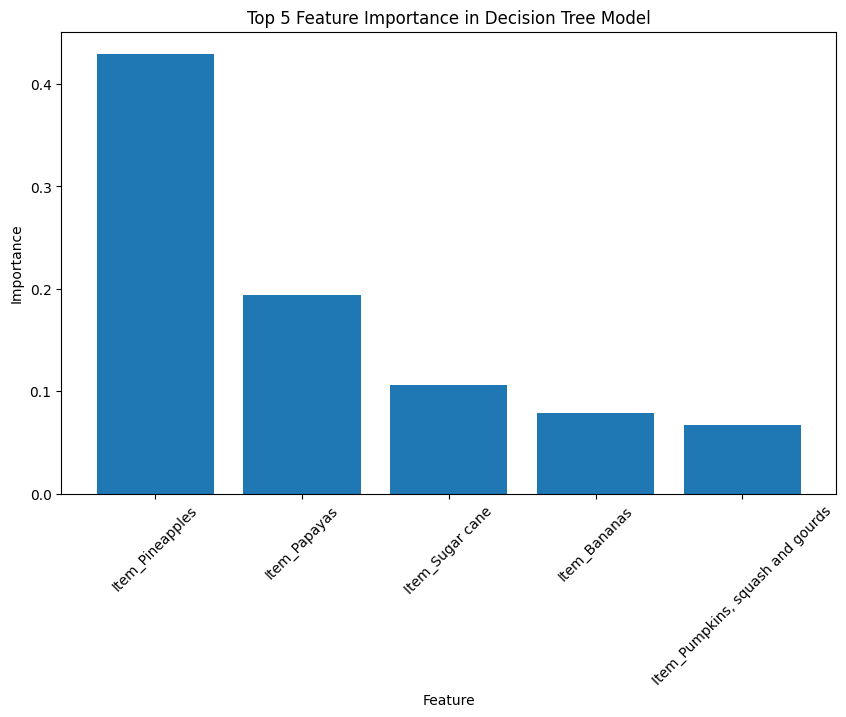

In [24]:
# Get feature importances
feature_importances = regressor.feature_importances_

# Map feature importances to feature names
feature_names = x_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print and visualize top 5 feature importances
print("Top 5 Feature Importances:")
for feature, importance in sorted_feature_importance[:5]:
    print(f"{feature}: {importance}")

# Create a bar chart to visualize top 5 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(5), [val[1] for val in sorted_feature_importance[:5]], align="center")
plt.xticks(range(5), [val[0] for val in sorted_feature_importance[:5]], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 5 Feature Importance in Decision Tree Model")
plt.show()